# Proyecto 4 AAD
## Sara Palacios, Samuel Pérez, Nicolás Rojas y Andrés Zapata

### Análisis descriptivo 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Grouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA


In [20]:
# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

In [15]:
df = pd.read_csv("datos.txt", 
                index_col="Date",
                dtype={'Temp': np.float32},
                parse_dates=True,
                date_parser=lambda date: pd.datetime.strptime(date, '%Y-%m-%d'))

In [16]:
df.head()

,Temp
Date,
1981-01-01,20.700001
1981-01-02,17.900000
1981-01-03,18.799999
1981-01-04,14.600000
1981-01-05,15.800000


In [17]:
s = pd.Series(df.unstack().values, index=df.index)

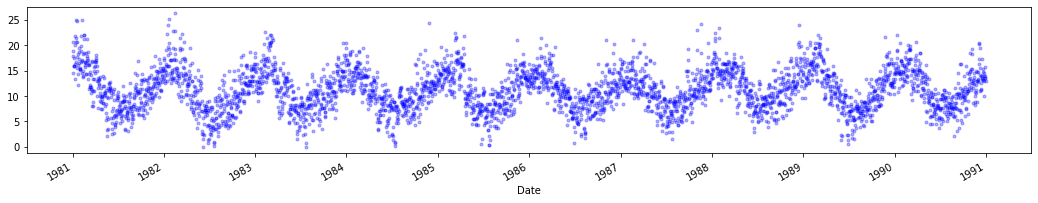

In [156]:
s.plot(style='b.',alpha=0.3);

In [23]:
s.size

3650

In [24]:
s.describe()

count   3650.00
mean      11.18
std        4.07
min        0.00
25%        8.30
50%       11.00
75%       14.00
max       26.30
dtype: float64

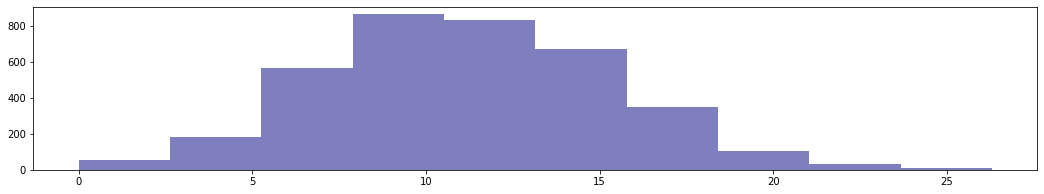

In [36]:
s.hist(alpha = 0.5,color='navy',grid=False);

<AxesSubplot:ylabel='Density'>

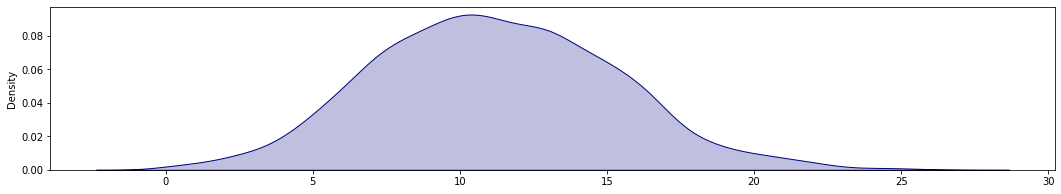

In [47]:
sns.kdeplot(s, shade=True,color='navy' )

In [53]:
s.groupby(Grouper(freq='Y'))
s

Date
1981-01-01   20.70
1981-01-02   17.90
1981-01-03   18.80
1981-01-04   14.60
1981-01-05   15.80
              ... 
1990-12-27   14.00
1990-12-28   13.60
1990-12-29   13.50
1990-12-30   15.70
1990-12-31   13.00
Length: 3650, dtype: float32

In [57]:
years, index = [], []
for name, gr in s.groupby(Grouper(freq='Y')):
    years.append(gr.values)
    index.append(name.year)
df = pd.DataFrame(years, index=index, columns=range(1,366))

In [58]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
1981,20.70,17.90,18.80,14.60,15.80,15.80,15.80,17.40,21.80,20.00,...,15.00,12.80,15.00,14.20,14.00,15.50,13.30,15.60,15.20,17.40
1982,17.00,15.00,13.50,15.20,13.00,12.50,14.10,14.80,16.20,15.80,...,10.80,15.60,15.30,13.90,13.00,15.30,16.30,15.80,17.70,16.30
1983,18.40,15.00,10.90,11.40,14.80,12.10,12.80,16.20,15.50,13.00,...,12.20,16.70,13.80,17.50,15.00,13.90,11.10,16.10,20.40,18.00
1984,19.50,17.10,17.10,12.00,11.00,16.30,16.10,13.00,13.40,15.20,...,14.20,11.40,13.70,16.50,12.80,12.20,12.00,12.60,16.00,16.40
1985,13.30,15.20,13.10,12.70,14.60,11.00,13.20,12.20,14.40,13.70,...,13.70,12.00,13.10,13.20,13.30,11.50,10.80,12.00,16.30,14.40
1986,12.90,13.80,10.60,12.60,13.70,12.60,13.10,15.40,11.90,13.80,...,11.60,9.70,13.40,10.50,14.70,14.60,14.20,13.20,11.70,17.20
1987,12.30,13.80,15.30,15.60,16.20,16.30,16.80,11.00,8.50,13.20,...,11.20,11.40,11.20,12.10,12.70,16.20,14.20,14.30,13.30,16.70
1988,15.30,14.30,13.50,15.00,13.60,15.20,17.00,18.70,16.50,17.40,...,11.90,15.20,17.30,19.80,15.80,9.50,12.90,12.90,14.80,14.10
1989,14.30,17.40,18.50,16.80,11.50,9.50,12.20,15.70,16.30,13.60,...,11.80,12.00,12.70,16.40,16.00,13.30,11.70,10.40,14.40,12.70
1990,14.80,13.30,15.60,14.50,14.30,15.30,16.40,14.80,17.40,18.80,...,13.20,13.90,10.00,12.90,14.60,14.00,13.60,13.50,15.70,13.00


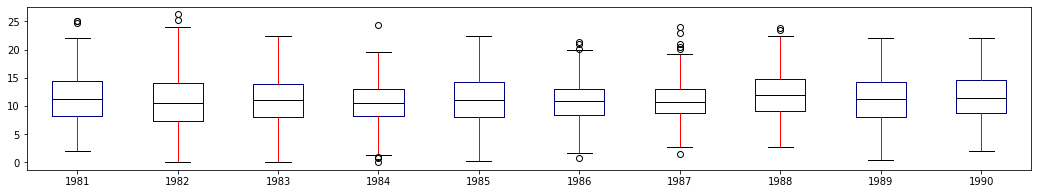

In [72]:
color = {'boxes': 'navy', 'whiskers': 'r', 'medians': 'black', 'caps': 'Black'}

df.head(10).T.boxplot(color=color, grid=False);

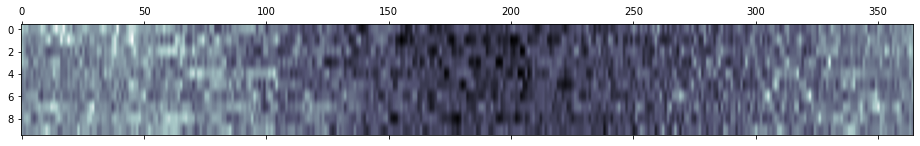

In [108]:
plt.matshow(df, interpolation=None, aspect='auto', cmap='bone');

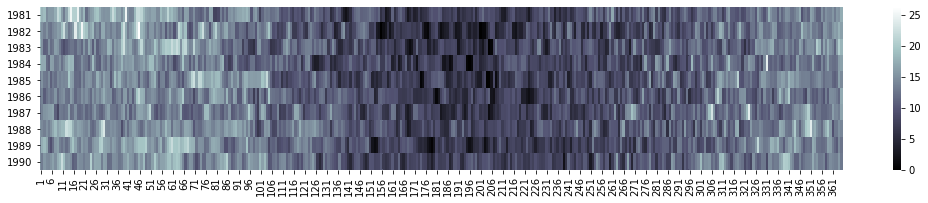

In [111]:
sns.heatmap(df,cmap='bone');

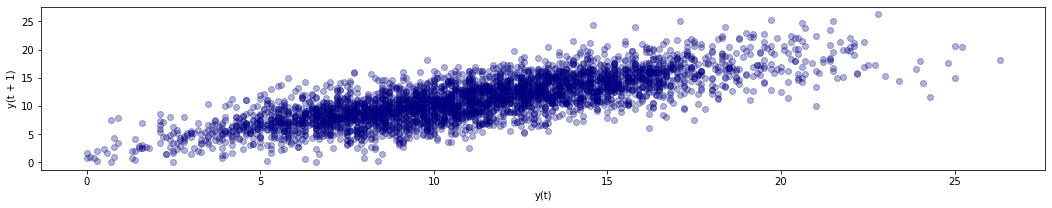

In [119]:
lag_plot(s,c='navy', alpha=0.3);

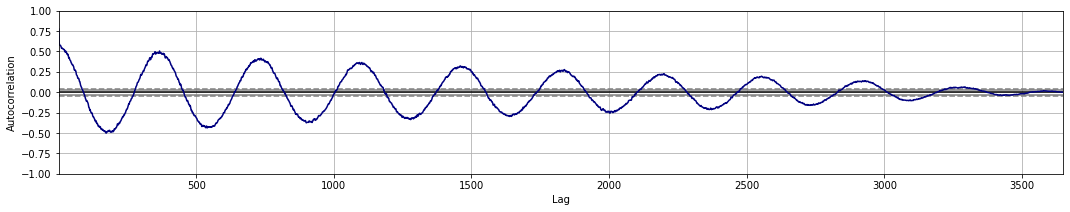

In [126]:
autocorrelation_plot(s,color='navy');

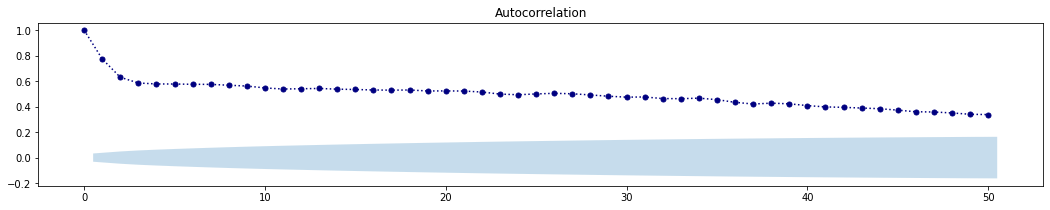

In [154]:
plot_acf(s, lags=50, color='navy', linestyle=':',use_vlines=False)
plt.show()

## Planteamiento del problema

La idea para este proyecto es predecir para un tiempo posterior, la temeratura mínima en Melbourne, Australia teniendo en cuenta los datos pasados que están en la serie temporal